## Compare the z-scores of genomic windows computed using `constraint-tools` with those of Chen et al 2022 

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I computed the z-scores that are "common" to Chen et al and McHale et al: 

```
experiments/germline-model/chen-et-al-2022/compute-overlapping-zscores.sh
```

In [1]:
import pandas as pd

CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
chen_mchale_zscores_filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.bed'
chen_mchale_zscores = pd.read_csv(chen_mchale_zscores_filename, sep='\t')
chen_mchale_zscores

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps
0,chr1,1488000,1489000,-7.408229,1487914,1488915,1488414,4.747864,296,-0.17083054729388564,146,296,915
1,chr1,1493000,1494000,-4.474465,1492940,1493941,1493440,4.367401,264,-0.15981839188117847,132,264,941
2,chr1,1494000,1495000,-8.346688,1493941,1494942,1494441,3.720978,319,-0.4277484385088953,152,319,942
3,chr1,1528000,1529000,-6.760843,1527996,1528997,1528496,3.033436,301,-0.7218858870250084,141,301,997
4,chr1,1547000,1548000,-4.818747,1546920,1547921,1547420,0.495223,263,-1.3226998013470443,119,263,921
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257883,chr9,137507000,137508000,0.730697,137507084,137508085,137507584,-1.163353,225,-1.1612951154492581,107,225,916
257884,chr9,137598000,137599000,-1.792983,137597929,137598930,137598429,0.506926,237,-1.071359478254977,112,237,930
257885,chr9,137599000,137600000,-2.525948,137598930,137599931,137599430,0.467112,233,-1.7031556258215002,105,233,931
257886,chr9,137620000,137621000,-3.753054,137620068,137621069,137620568,1.028901,229,0.07242353727933569,120,229,932


In [2]:
chen_mchale_zscores['mchale_K_bar'] = pd.to_numeric(chen_mchale_zscores['mchale_K_bar'], errors='coerce')
chen_mchale_zscores[chen_mchale_zscores['mchale_K_bar'].isna()]

,chromosome,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps
2875,chr1,37696000,37697000,4.310344,37695950,37696951,37696450,-5.858815,127,NaN,66,127,951
3070,chr1,40223000,40224000,3.804207,40222994,40223995,40223494,-5.108220,124,NaN,68,124,995
4440,chr1,54003000,54004000,-5.215620,54002965,54003966,54003465,14.840768,424,NaN,188,424,966
8565,chr1,90425000,90426000,2.523373,90425002,90426003,90425502,-3.929307,135,NaN,74,135,998
10453,chr1,108899000,108900000,3.323828,108898994,108899995,108899494,-4.922230,124,NaN,63,124,995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250950,chr9,38076000,38077000,-8.826003,38075960,38076961,38076460,18.840106,490,NaN,199,490,961
251011,chr9,61664000,61665000,-9.603030,61664023,61665024,61664523,15.870533,429,NaN,195,429,977
252191,chr9,79103000,79104000,-7.230230,79103032,79104033,79103532,14.550842,456,NaN,182,455,968
256599,chr9,120610000,120611000,3.258928,120610012,120611013,120610512,-4.852401,125,NaN,79,125,988


In [3]:
chen_mchale_zscores = chen_mchale_zscores.dropna()

In [4]:
chen_mchale_zscores.describe()

,chen_start,chen_end,chen_zscore,mchale_start,mchale_end,mchale_position,mchale_N_bar,mchale_N_observed,mchale_K_bar,mchale_K_observed,mchale_M,overlap_bps
count,2.576570e+05,2.576570e+05,257657.000000,2.576570e+05,2.576570e+05,2.576570e+05,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000,257657.000000
mean,8.211134e+07,8.211234e+07,-0.626094,8.211133e+07,8.211233e+07,8.211183e+07,-0.123734,200.369856,0.014211,106.131151,200.362257,950.818324
std,5.472855e+07,5.472855e+07,2.083320,5.472855e+07,5.472855e+07,5.472855e+07,2.210617,30.452046,0.982519,16.225943,30.449610,28.926395
min,5.220000e+05,5.230000e+05,-9.994907,5.220890e+05,5.230900e+05,5.225890e+05,-9.121771,128.000000,-4.776766,53.000000,128.000000,901.000000
25%,3.723900e+07,3.724000e+07,-1.765699,3.723909e+07,3.724009e+07,3.723959e+07,-1.546801,181.000000,-0.639530,95.000000,181.000000,926.000000
50%,7.400700e+07,7.400800e+07,-0.487689,7.400709e+07,7.400809e+07,7.400759e+07,-0.447569,196.000000,0.028681,104.000000,196.000000,951.000000
75%,1.163670e+08,1.163680e+08,0.696284,1.163669e+08,1.163679e+08,1.163674e+08,0.852049,214.000000,0.687698,115.000000,214.000000,976.000000
max,2.483380e+08,2.483390e+08,9.924837,2.483380e+08,2.483390e+08,2.483385e+08,18.372572,431.000000,4.560088,234.000000,431.000000,1000.000000


In [5]:
# Chen et al's z-score is positive for negative selection, 
# whereas McHale et al's z-score is negative for negative selection
chen_mchale_zscores['chen_negative_zscore'] = -chen_mchale_zscores['chen_zscore']

<ipython-input-5-af71c5ed6440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chen_mchale_zscores['chen_negative_zscore'] = -chen_mchale_zscores['chen_zscore']


Text(0.5, 0, 'z-score')

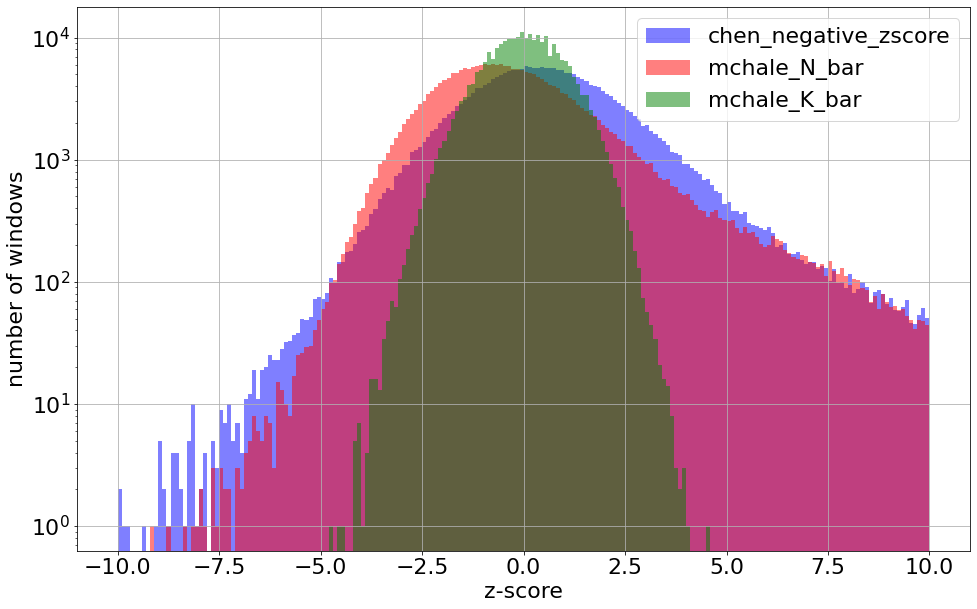

In [6]:
# Chen et al's method may be more sensitive than McHale et al,
# as the former has a greater number of windows with very small z-scores for SNV density
# (chen_negative_zscore and mchale_N_bar, respectively). 
# This would not be surprising, as Chen et al use additional features to call negative selection. 

# For completeness, I also show the z-scores that McHale et al compute for singleton density (mchale_K_bar)

import numpy as np 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

bin_width = 0.1
bin_edges = np.arange(-10, 10+bin_width, bin_width)
axis = chen_mchale_zscores['chen_negative_zscore'].hist(alpha=0.5, color='blue', legend=True, bins=bin_edges)
axis = chen_mchale_zscores['mchale_N_bar'].hist(ax=axis, alpha=0.5, color='red', legend=True, bins=bin_edges)
axis = chen_mchale_zscores['mchale_K_bar'].hist(ax=axis, alpha=0.5, color='green', legend=True, bins=bin_edges)
axis.set_yscale('log')
axis.figure.set_size_inches(16,10)
axis.set_ylabel('number of windows')
axis.set_xlabel('z-score')

/uufs/chpc.utah.edu/common/HIPAA/u6018199/.conda/envs/constraint-tools/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


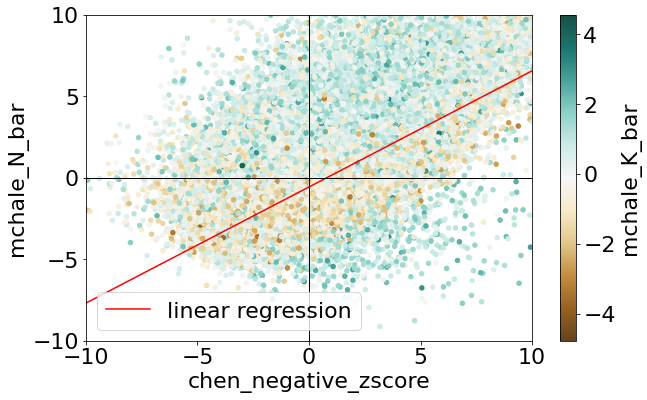

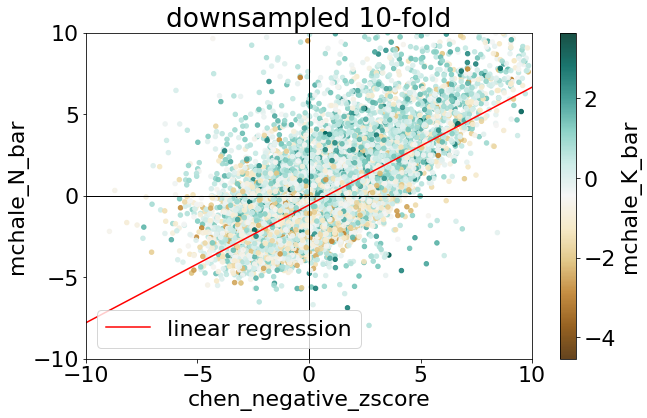

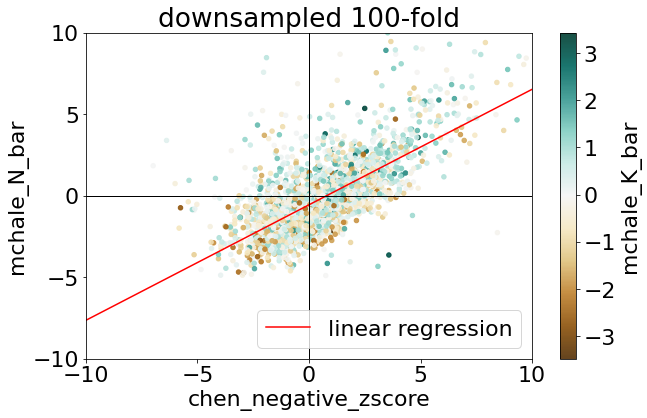

In [7]:
# We'd expect that Chen et al's zscore and McHale et al's zscore for SNV density (mchale_N_bar) are correlated.
# This appears to be the case: 

from sklearn.linear_model import LinearRegression

def correlate_zscores(x_label, y_label, z_label, step_size=1): 
#     df = chen_mchale_zscores[chen_mchale_zscores['mchale_K_bar'] < -3]

    df = chen_mchale_zscores.iloc[::step_size, :]
        
    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    axis = df.plot.scatter(
        x=x_label,
        y=y_label,
        c=z_label,
        colormap = 'BrBG',
        alpha = 0.9,
        ax=axis        
    )

    linear_regression = LinearRegression()
    linear_regression.fit(
        np.array(df[x_label]).reshape(-1,1), 
        np.array(df[y_label])
    )
    x = [-10, 10]
    linear_regression_fit = linear_regression.predict(np.array(x).reshape(-1,1))
    plt.plot(x, linear_regression_fit, 'red', label='linear regression')

    axis.set_xlim(-10, 10)
    axis.set_ylim(-10, 10)
    axis.figure.set_size_inches(10,6)
    plt.legend()
    
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')

    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')

for step_size in [1, 10, 100]:
    correlate_zscores(    
        x_label='chen_negative_zscore',
        y_label='mchale_N_bar',
        z_label='mchale_K_bar',
        step_size=step_size
    )

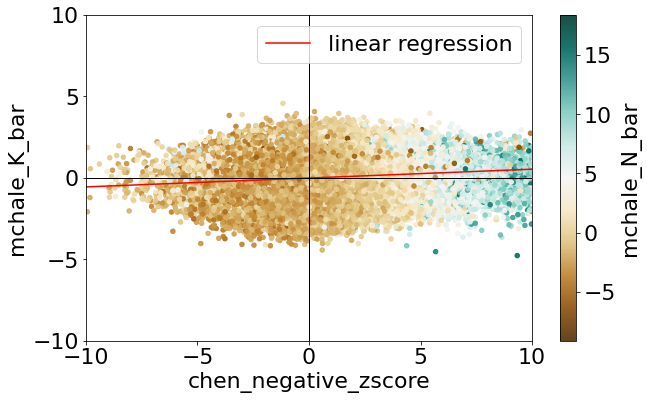

In [8]:
# Given that Chen et al's z-score is expected to be better than N_bar
# (by virtue of the additional features used to compute the former),
# let's plot the joint distribution of K_bar (singleton z-score) and chen_negative_zscore. 

correlate_zscores(    
    x_label='chen_negative_zscore',
    y_label='mchale_K_bar',
    z_label='mchale_N_bar'
)

In [9]:
# Importantly, the figure above shows that there is little correlation between K_bar and Chen's z-score, 
# suggesting that, in combination, they could be more powerful at predicting constraint 
# than either alone would be. 

# Alternatively, the lack of correlation could be because K_bar is noisy 
# (notice the reduced range of values this z-score takes on compared to the SNV density z-scores), 
# in which case combining SNV and singleton z-scores would not be expected to increase performance, 
# and may actually hurt it. 

# Future analyses, e.g., plotting enrichment for GWAS hits as a function of z-score, should resolve this. 